In [49]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#### 라이브러리 ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
## config
plt.rc('font', family='NanumBarunGothic') 

In [3]:
#### data
df1 = pd.read_csv('/content/drive/MyDrive/0.Data for analysis/pair coding/1.ev_app_resident.csv')
df2 = pd.read_csv('/content/drive/MyDrive/0.Data for analysis/pair coding/2.ev_app_activity.csv')
df3 = pd.read_csv('/content/drive/MyDrive/0.Data for analysis/pair coding/3.ev_app_activity_resident.csv')

# EDA

In [6]:
df1

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust
0,20220605,7,4146,용인시,41463572,동백1동,86135034,127.152250,37.286300,MALE,6,EV라운지,5,3.522
1,20220625,6,4146,용인시,41465580,상현2동,84375196,127.090080,37.309536,MALE,8,파워큐브차저,2,4.231
2,20220614,2,4146,용인시,41461250,포곡읍,87958893,127.216600,37.274303,FEMALE,14,EV라운지,1,18.440
3,20220619,7,4146,용인시,41465530,신봉동,84119243,127.080970,37.323480,MALE,13,EV라운지,2,4.335
4,20220624,5,4146,용인시,41465580,상현2동,84423187,127.091780,37.306840,MALE,8,EV라운지,4,4.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292038,20220605,7,4146,용인시,41465570,상현1동,84071205,127.079384,37.304993,MALE,2,EV라운지,3,5.082
292039,20220607,2,4146,용인시,41461510,중앙동,87286847,127.193080,37.234580,MALE,3,EV라운지,6,4.585
292040,20220611,6,4146,용인시,41461259,남사읍,86630714,127.170300,37.156097,MALE,13,EV라운지,2,6.452
292041,20220618,6,4146,용인시,41461360,양지면,89926672,127.286095,37.230280,MALE,9,EV라운지,6,3.071


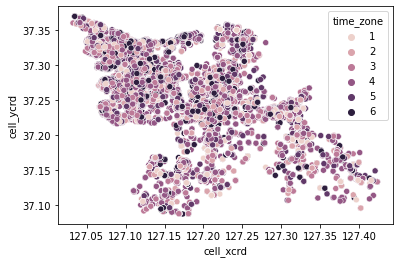

In [7]:
sns.scatterplot(x = df1['cell_xcrd'], y = df1['cell_ycrd'], hue = df1['time_zone']);

In [8]:
df1.value_counts('adng_nm')

adng_nm
구갈동      13819
죽전1동     13640
역삼동      13456
성복동      12615
동천동      12160
풍덕천2동    11760
상현1동     11491
신갈동      11129
구성동      11029
신봉동      10955
보라동      10520
풍덕천1동    10395
보정동       9684
동백1동      9627
모현읍       9371
마북동       9325
유림동       9048
상현2동      8940
포곡읍       8872
상하동       8809
동백2동      7431
영덕1동      7264
영덕2동      6726
중앙동       6232
양지면       6091
죽전2동      5808
동백3동      5296
남사읍       5285
이동읍       5053
서농동       4954
기흥동       4527
상갈동       4488
동부동       3020
원삼면       2177
백암면       1046
dtype: int64

In [9]:
df1['time_zone'].value_counts()

4    91537
3    52764
5    50688
2    39157
6    32383
1    25514
Name: time_zone, dtype: int64

In [10]:
time = df1.groupby('time_zone', as_index = False)
time.count()

,time_zone,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,count_cust
0,1,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514,25514
1,2,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157,39157
2,3,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764,52764
3,4,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537,91537
4,5,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688,50688
5,6,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383,32383


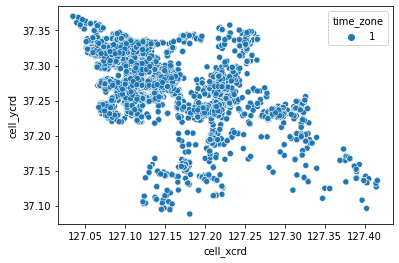

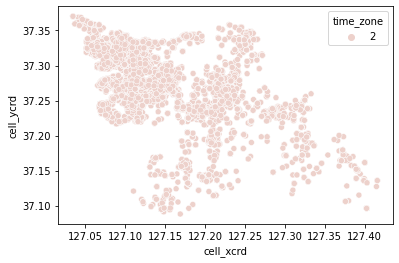

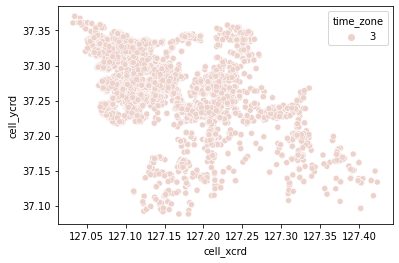

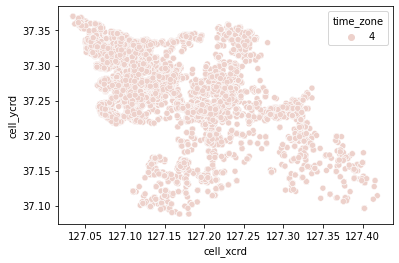

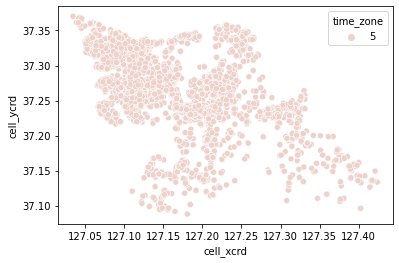

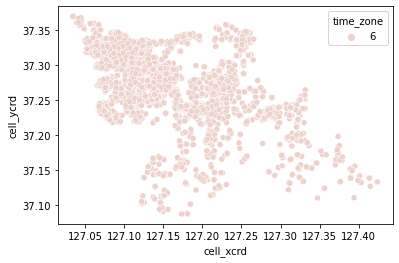

In [11]:
for i in range(1,7):
    tmp = df1[df1['time_zone'] == i]
    sns.scatterplot(x = 'cell_xcrd', y = 'cell_ycrd',data = tmp, hue = 'time_zone')
    plt.show()

In [20]:
df1['adng_nm'].value_counts().sort_index()

# df1.groupby('adng_nm', as_index = True).mean().index

구갈동      13819
구성동      11029
기흥동       4527
남사읍       5285
동백1동      9627
동백2동      7431
동백3동      5296
동부동       3020
동천동      12160
마북동       9325
모현읍       9371
백암면       1046
보라동      10520
보정동       9684
상갈동       4488
상하동       8809
상현1동     11491
상현2동      8940
서농동       4954
성복동      12615
신갈동      11129
신봉동      10955
양지면       6091
역삼동      13456
영덕1동      7264
영덕2동      6726
원삼면       2177
유림동       9048
이동읍       5053
죽전1동     13640
죽전2동      5808
중앙동       6232
포곡읍       8872
풍덕천1동    10395
풍덕천2동    11760
Name: adng_nm, dtype: int64

In [62]:
dong['cell_ycrd'].mean()
dong['cell_xcrd'].mean()

127.14914848299298

In [67]:
from folium.plugins import MarkerCluster

# 위도
latitude = dong['cell_ycrd'].mean()
# 경도
longitude = dong['cell_xcrd'].mean()

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=17
)

coords = dong[['cell_xcrd', 'cell_ycrd']]


popup = folium.Popup(iframe, min_width=200, max_width=200)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['cell_xcrd'], coords['cell_ycrd']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

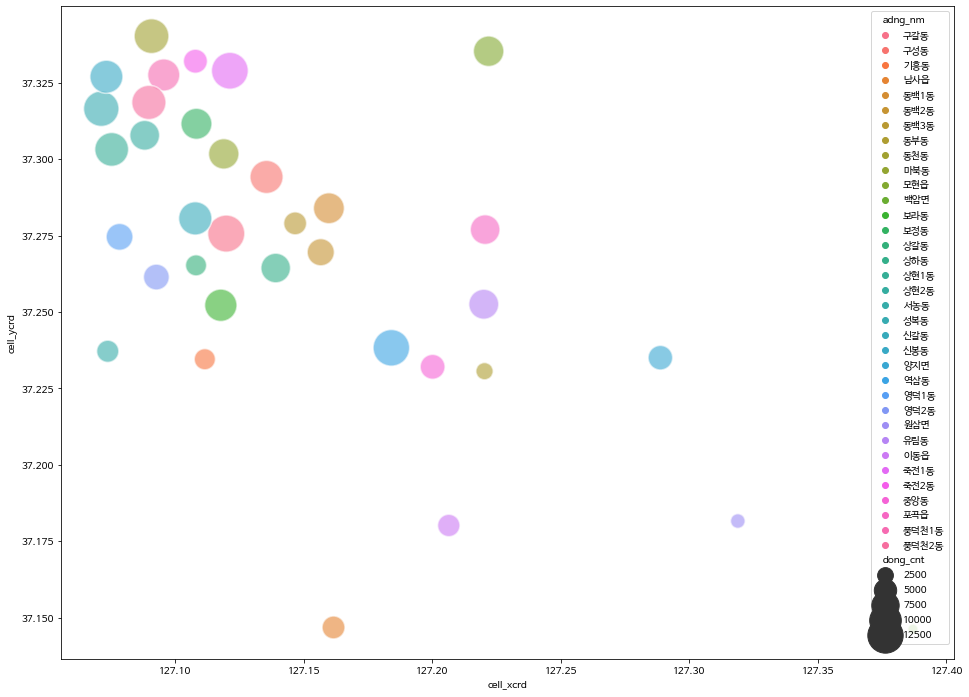

In [48]:
plt.figure(figsize = (16,12))

dong = df1.groupby('adng_nm', as_index = False).mean()[['adng_nm','cell_xcrd','cell_ycrd']]
dong['dong_cnt'] = df1['adng_nm'].value_counts().sort_index().values

# dong.plot(kind = "scatter", x = 'cell_xcrd',y = 'cell_ycrd', s=dong['dong_cnt']/100, cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

sizes = (df1['adng_nm'].value_counts().min()/10, df1['adng_nm'].value_counts().max()/10)

sns.scatterplot(
    x = 'cell_xcrd',
    y = 'cell_ycrd', 
    data =dong, 
    hue = 'adng_nm',
    size= 'dong_cnt', 
    sizes = sizes,
    alpha = 0.6 );



In [38]:
df1['adng_nm'].value_counts().sort_index().values

array([13819, 11029,  4527,  5285,  9627,  7431,  5296,  3020, 12160,
        9325,  9371,  1046, 10520,  9684,  4488,  8809, 11491,  8940,
        4954, 12615, 11129, 10955,  6091, 13456,  7264,  6726,  2177,
        9048,  5053, 13640,  5808,  6232,  8872, 10395, 11760])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


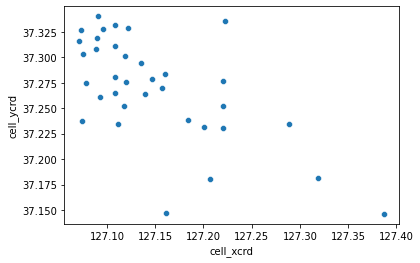

In [13]:
## 동 별로 사람들이 얼마나 있는지?
x = df1.groupby('adng_nm', as_index = False).mean()['cell_xcrd']
y = df1.groupby('adng_nm', as_index = False).mean()['cell_ycrd']


sns.scatterplot(x,y);